In [ ]:
# yolov5x6 trained on Multi-GPU Distributed Data Parallel Mode 
# with larger batch size

In [ ]:
# trained model (best weight)
# !gdown 1hq0KcSM31yrR4YlWqM_P29Y3YTuvuIom

In [1]:
!nvidia-smi

Thu Sep 29 04:11:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:04:00.0 Off |                  N/A |
| 30%   28C    P8    26W / 350W |      1MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:08:00.0 Off |                  N/A |
| 30%   

In [2]:
import shutil
import os

In [3]:
%%capture
!pip3 install --upgrade gdown

In [4]:
!gdown 1X3O2v3GIPveq3ylWF6o1qHI5uzbN1vWA

Downloading...
From: https://drive.google.com/uc?id=1X3O2v3GIPveq3ylWF6o1qHI5uzbN1vWA
To: /usr/src/rotated2.zip
100%|██████████████████████████████████████| 2.61G/2.61G [00:28<00:00, 90.1MB/s]


In [5]:
%%capture
!apt install unzip

In [6]:
%%capture
!unzip rotated2.zip
%mv ./content/* ./

In [8]:
## ad-hoc train test split; better split/k-fold etc. is welcomed

import random
id_list=[i for i in range(1500)]
random.shuffle(id_list)

train_ids = id_list[:1400]
val_ids = id_list[1400:]
test_ids = val_ids

def move_helper(ids, desti):
  for id in ids:
    img_name = os.path.join( './yoloTACO/images', str(id)+'.jpg' )
    lbl_name = os.path.join( './yoloTACO/labels', str(id)+'.txt' )
    print(img_name)
    if os.path.isfile(img_name):
        shutil.copy( img_name, './yoloTACO/images/'+desti)
        shutil.copy( lbl_name, './yoloTACO/labels/'+desti)
    else :
        print('file does not exist', img_name)

In [9]:
%%capture
!mkdir -p yoloTACO/images/train
!mkdir -p yoloTACO/images/val
!mkdir -p yoloTACO/images/test
!mkdir -p yoloTACO/labels/train
!mkdir -p yoloTACO/labels/val
!mkdir -p yoloTACO/labels/test
move_helper(test_ids,'test')
move_helper(train_ids,'train')
move_helper(val_ids,'val')

In [10]:
#@title yml

with open('./yolov5/data/yoloTACO.yaml', mode='w') as fp:
  lines = '''path: ../yoloTACO  # dataset root dir
train: images/train  # train images 
val: images/val  # val images 
test: images/test # test images 

# Classes
names:
  0: Aluminium foil
  1: Battery
  2: Aluminium blister pack
  3: Carded blister pack
  4: Other plastic bottle
  5: Clear plastic bottle
  6: Glass bottle
  7: Plastic bottle cap
  8: Metal bottle cap
  9: Broken glass
  10: Food Can
  11: Aerosol
  12: Drink can
  13: Toilet tube
  14: Other carton
  15: Egg carton
  16: Drink carton
  17: Corrugated carton
  18: Meal carton
  19: Pizza box
  20: Paper cup
  21: Disposable plastic cup
  22: Foam cup
  23: Glass cup
  24: Other plastic cup
  25: Food waste
  26: Glass jar
  27: Plastic lid
  28: Metal lid
  29: Other plastic
  30: Magazine paper
  31: Tissues
  32: Wrapping paper
  33: Normal paper
  34: Paper bag
  35: Plastified paper bag
  36: Plastic film
  37: Six pack rings
  38: Garbage bag
  39: Other plastic wrapper
  40: Single-use carrier bag
  41: Polypropylene bag
  42: Crisp packet
  43: Spread tub
  44: Tupperware
  45: Disposable food container
  46: Foam food container
  47: Other plastic container
  48: Plastic glooves
  49: Plastic utensils
  50: Pop tab
  51: Rope & strings
  52: Scrap metal
  53: Shoe
  54: Squeezable tube
  55: Plastic straw
  56: Paper straw
  57: Styrofoam piece
  58: Unlabeled litter
  59: Cigarette'''
  fp.writelines(lines)

In [11]:
!pwd

/usr/src


In [12]:
%cd ./yolov5
!ls

/usr/src/yolov5
CONTRIBUTING.md  classify   hubconf.py	      setup.cfg       val.py
LICENSE		 data	    models	      train.py
README.md	 detect.py  requirements.txt  tutorial.ipynb
benchmarks.py	 export.py  segment	      utils


In [13]:
# check if we have
!pip list -v | grep [Aa]lbumentations

albumentations                1.3.0                    /opt/conda/lib/python3.8/site-packages pip


In [17]:
# Train

!python -m torch.distributed.launch --nproc_per_node 4 train.py --batch-size 32 --data yoloTACO.yaml --weights yolov5x6.pt \
--img 960 \
--epochs 1000


/opt/conda/lib/python3.8/site-packages/torch/distributed/launch.py:178: FutureWarning: The module torch.distributed.launch is deprecated
and will be removed in future. Use torchrun.
Note that --use_env is set by default in torchrun.
If your script expects `--local_rank` argument to be set, please
change it to read from `os.environ['LOCAL_RANK']` instead. See 
https://pytorch.org/docs/stable/distributed.html#launch-utility for 
further instructions

  warnings.warn(
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5x6.pt, cfg=, data=yoloTACO.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1000, batch_size=32, imgsz=960, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD,

In [21]:
from utils.plots import plot_results 
plot_results('/content/yolov5/runs/train/exp/results.csv') 

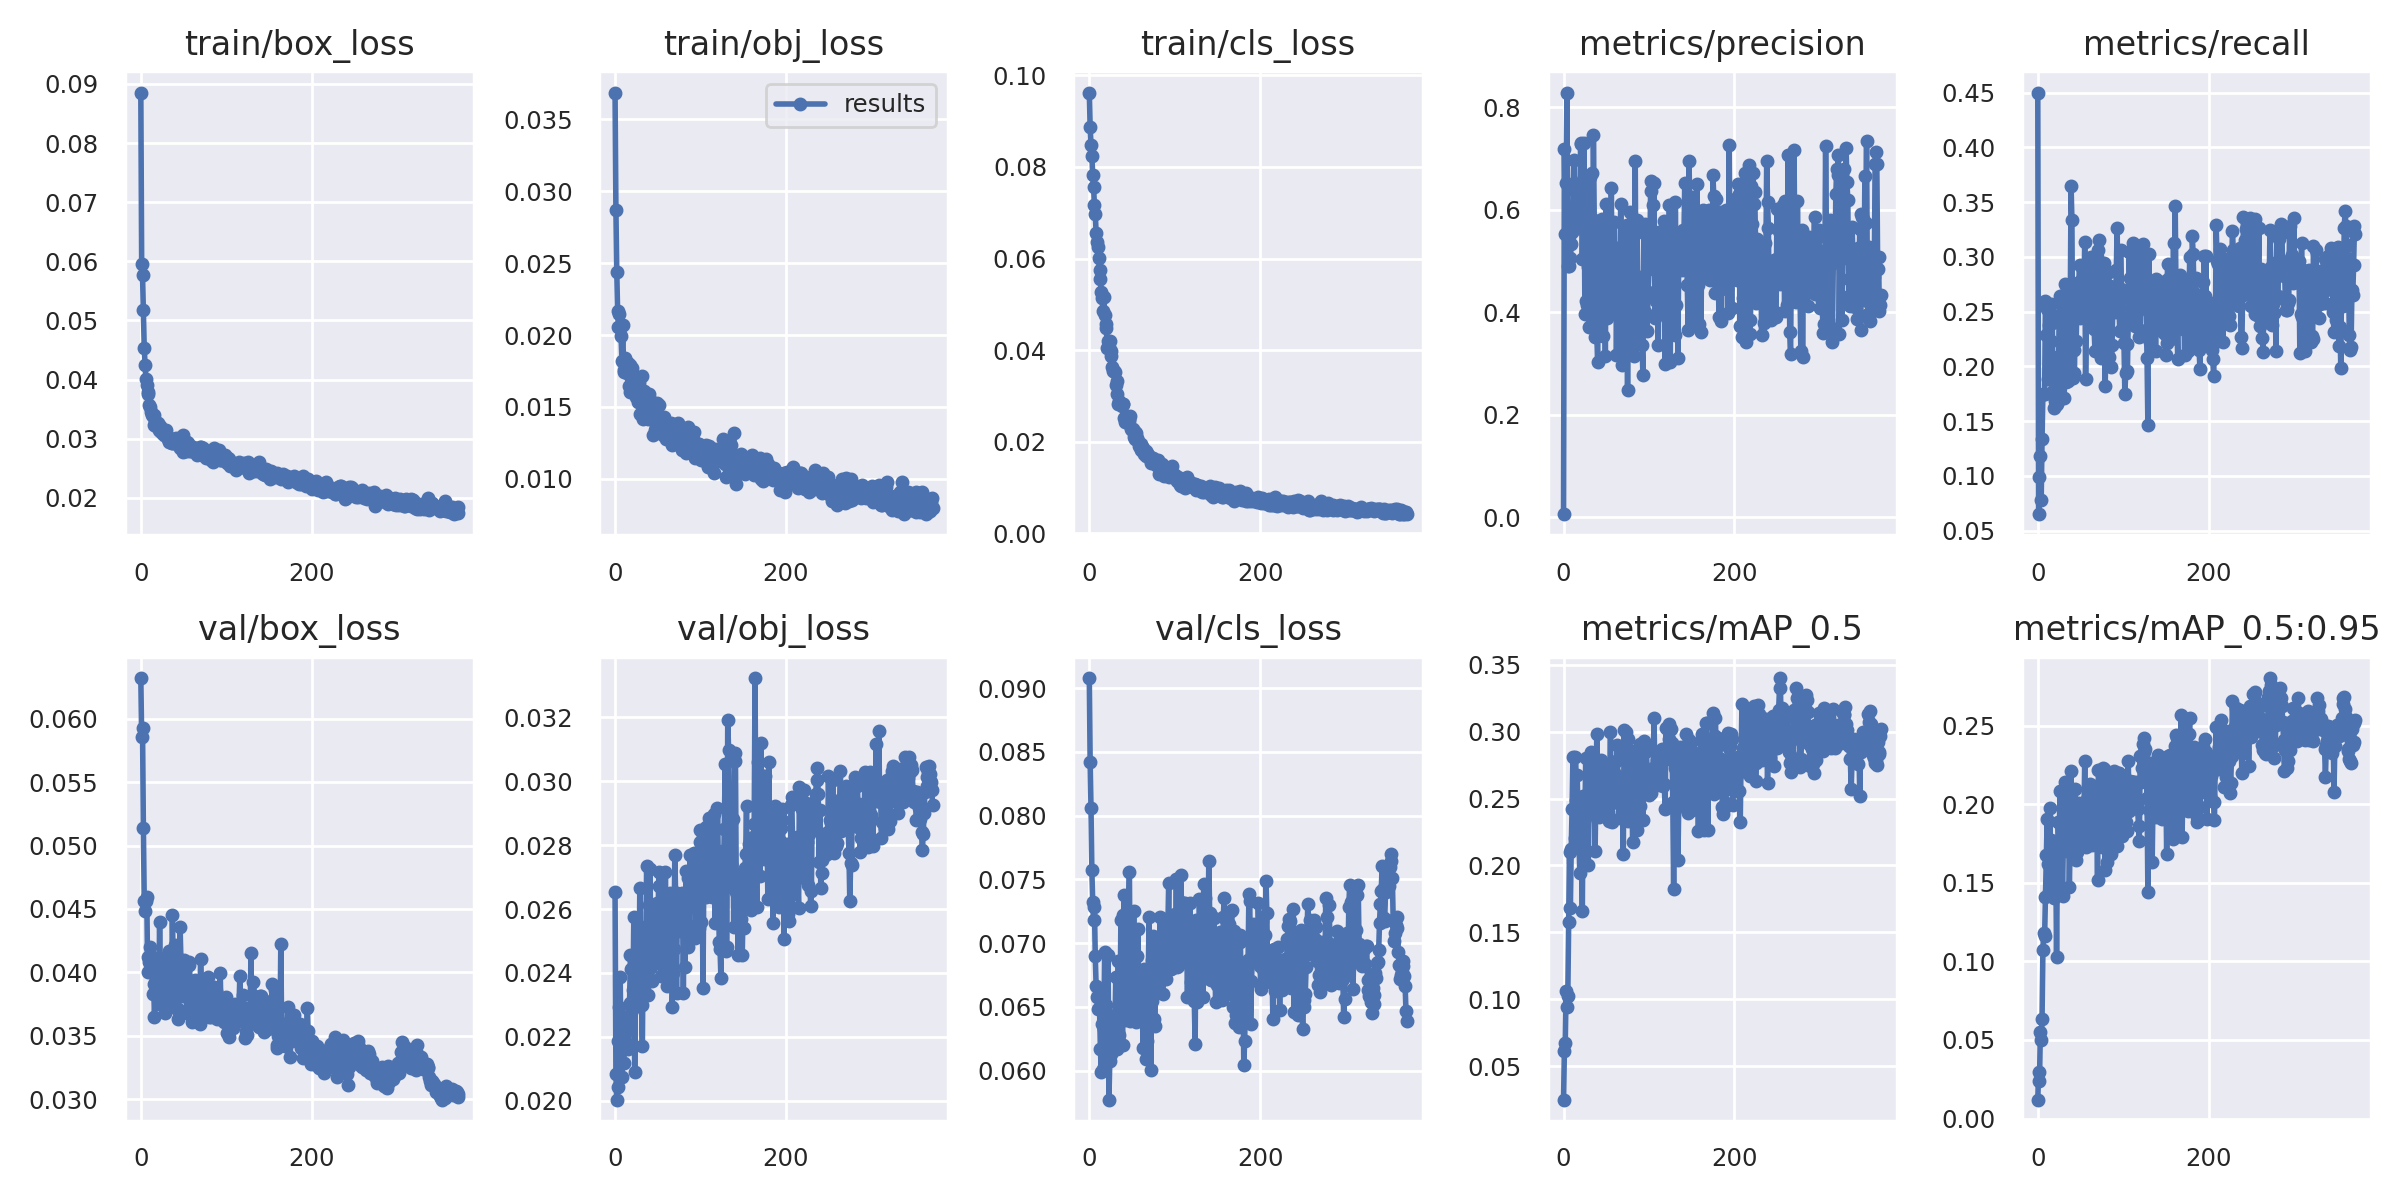

In [19]:
from IPython import display
display.Image("./runs/train/exp/results.png")

In [20]:
!python val.py --data yoloTACO.yaml --weights runs/train/exp/weights/best.pt

val: data=/usr/src/yolov5/data/yoloTACO.yaml, weights=['runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-178-g799e3d0 Python-3.8.13 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24268MiB)

Fusing layers... 
Model summary: 416 layers, 140537980 parameters, 0 gradients, 209.1 GFLOPs
val: Scanning '/usr/src/yoloTACO/labels/val.cache' images and labels... 100 foun
                 Class     Images  Instances          P          R      mAP50   
                   all        100        333      0.503      0.291      0.302      0.254
Speed: 0.4ms pre-process, 10.9ms inference, 5.0ms NMS per image at shape (32, 3, 640, 640)
Results saved to runs/val/exp
